# Recognizing Handwritten Digits on MNIST Dataset using KNN

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Data Preparation

df = pd.read_csv('dataset/train.csv')
print(df.shape)

(42000, 785)


In [5]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [6]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data = df.values
print(df.shape)

(42000, 785)


In [8]:
x = data[:,1:]
y = data[:,0]
print(x.shape,y.shape)

(42000, 784) (42000,)


In [9]:
split = int(0.8*x.shape[0])
print(split)

33600


In [10]:
X_train = x[:split,:]
X_test = x[split:,:]
Y_train = y[:split]
Y_test = y[split:]
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(33600, 784) (8400, 784)
(33600,) (8400,)


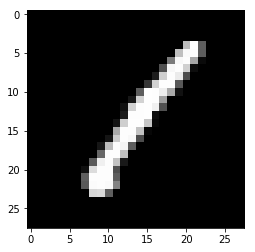

1


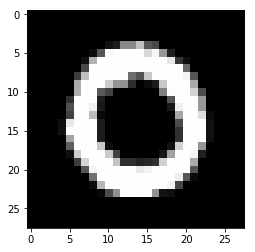

0


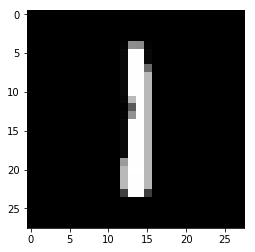

1


In [11]:
def drawImage(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap = 'gray')
    plt.show()
for i in range(3):
    drawImage(X_train[i])
    print(Y_train[i])

In [12]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(x,y,query_point,k=5):
    distance_array = []
    for i in range(x.shape[0]):
        dist = distance(x[i],query_point)
        distance_array.append((dist,y[i]))
    distance_array = sorted(distance_array)
    distance_array = np.array(distance_array)
    distance_array = distance_array[:k]
    print(distance_array)
    unique_vals = np.unique(distance_array[:,1],return_counts=True)
    print(unique_vals)
    max_freq_index = unique_vals[1].argmax()
    print(max_freq_index)
    return unique_vals[0][max_freq_index]

In [13]:
prediction = knn(X_train,Y_train,X_test[8])
print("Predicted number is ",int(prediction))

[[1603.14784097    8.        ]
 [1640.90523797    8.        ]
 [1704.42688315    0.        ]
 [1726.45416968    5.        ]
 [1728.68389245    5.        ]]
(array([0., 5., 8.]), array([1, 2, 2], dtype=int64))
1
Predicted number is  5


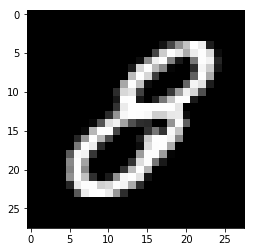

8


In [14]:
drawImage(X_test[8])
print(Y_test[8])

## Accuracy of KNN over Test Set

In [15]:
X_test = X_test[:100,:]
Y_test = Y_test[:100]
Y_pred = []
print("Starting algorithm")
for i in range(X_test.shape[0]):
    prediction = knn(X_train,Y_train,X_test[i])
    Y_pred.append(int(prediction))
    print("Prediction is ",prediction)
print("Algorithm finished Executing")

Starting algorithm
[[1213.36886395    0.        ]
 [1235.20322215    0.        ]
 [1328.63576649    0.        ]
 [1400.12285175    0.        ]
 [1411.82612244    0.        ]]
(array([0.]), array([5], dtype=int64))
0
Prediction is  0.0
[[1145.78095638    7.        ]
 [1150.19346199    7.        ]
 [1171.67572306    7.        ]
 [1215.04032855    7.        ]
 [1280.82590542    7.        ]]
(array([7.]), array([5], dtype=int64))
0
Prediction is  7.0
[[796.45150512   7.        ]
 [804.23131001   7.        ]
 [860.68170656   7.        ]
 [875.86699904   7.        ]
 [896.31132984   7.        ]]
(array([7.]), array([5], dtype=int64))
0
Prediction is  7.0
[[1506.99933643    2.        ]
 [1571.6459525     2.        ]
 [1577.24538357    2.        ]
 [1593.9661226     2.        ]
 [1623.17312693    2.        ]]
(array([2.]), array([5], dtype=int64))
0
Prediction is  2.0
[[1406.3075766     2.        ]
 [1442.46629077    2.        ]
 [1443.44518427    2.        ]
 [1460.50676137    2.        ]
 [1

[[1236.27585918    0.        ]
 [1340.3275719     0.        ]
 [1366.54527916    0.        ]
 [1454.01237959    0.        ]
 [1471.74726091    0.        ]]
(array([0.]), array([5], dtype=int64))
0
Prediction is  0.0
[[1035.44869501    8.        ]
 [1162.4185993     8.        ]
 [1284.53804926    8.        ]
 [1301.45533923    8.        ]
 [1303.7825739     8.        ]]
(array([8.]), array([5], dtype=int64))
0
Prediction is  8.0
[[1118.82170161    0.        ]
 [1161.74093498    0.        ]
 [1189.77813058    0.        ]
 [1291.52855176    0.        ]
 [1310.06068562    0.        ]]
(array([0.]), array([5], dtype=int64))
0
Prediction is  0.0
[[ 995.78662373    9.        ]
 [1186.32373322    9.        ]
 [1207.68994365    9.        ]
 [1231.7134407     9.        ]
 [1234.54121033    9.        ]]
(array([9.]), array([5], dtype=int64))
0
Prediction is  9.0
[[321.02492115   1.        ]
 [399.29437762   1.        ]
 [412.4487847    1.        ]
 [420.17258359   1.        ]
 [529.41949341   1. 

[[ 767.63598144    9.        ]
 [ 847.96992871    9.        ]
 [ 884.3884893     9.        ]
 [1008.77698229    9.        ]
 [1032.32698308    9.        ]]
(array([9.]), array([5], dtype=int64))
0
Prediction is  9.0
[[ 914.77374252    9.        ]
 [ 945.07936175    9.        ]
 [ 983.94359594    9.        ]
 [1006.76263339    9.        ]
 [1011.57846952    9.        ]]
(array([9.]), array([5], dtype=int64))
0
Prediction is  9.0
[[1178.34884478    0.        ]
 [1214.68102809    0.        ]
 [1234.99109309    0.        ]
 [1240.73566887    0.        ]
 [1253.59842055    0.        ]]
(array([0.]), array([5], dtype=int64))
0
Prediction is  0.0
[[624.18346662   1.        ]
 [625.46622611   1.        ]
 [654.05886585   1.        ]
 [658.68581281   1.        ]
 [680.76941764   1.        ]]
(array([1.]), array([5], dtype=int64))
0
Prediction is  1.0
[[1307.8298819     5.        ]
 [1313.50447278    5.        ]
 [1325.65757268    5.        ]
 [1386.58140764    5.        ]
 [1427.8256196     5. 

In [16]:
y_test_init = Y_test[:100]
acc = ((Y_pred==y_test_init).sum())/X_test.shape[0]
print(acc)

0.96


In [24]:
print(y_test_init)

[0 7 7 2 2 6 5 7 8 5 3 0 2 7 6 9 2 3 5 1 6 2 8 0 2 8 9 3 9 4 7 8 4 1 3 9 3
 4 0 8 0 9 1 8 5 5 9 4 1 8 7 7 4 4 3 3 7 5 6 5 4 6 9 6 4 1 5 3 8 0 6 0 0 2
 5 9 9 9 0 1 5 8 9 1 8 1 4 6 1 0 2 1 6 1 6 2 4 3 7 7]


In [20]:
print(Y_pred)

[0, 7, 7, 2, 2, 6, 5, 7, 5, 5, 3, 0, 2, 7, 6, 9, 2, 3, 5, 1, 6, 2, 8, 0, 2, 8, 9, 7, 9, 4, 7, 8, 4, 1, 3, 9, 3, 4, 0, 8, 0, 9, 1, 8, 5, 5, 9, 4, 1, 8, 7, 7, 4, 4, 3, 3, 7, 5, 6, 5, 4, 6, 9, 6, 4, 1, 5, 3, 8, 0, 6, 0, 0, 2, 5, 7, 9, 9, 0, 1, 5, 8, 9, 1, 8, 1, 4, 6, 1, 0, 2, 1, 6, 1, 6, 0, 4, 3, 7, 7]
